### Piano Spectrum Survey
#### Jai Jeffryes
#### March 14, 2018

In my last notebook, I examined the spectrum of a single piano tone and synthesized a sound based on the harmonics I observed. I was surprised that the harmonic series of the sampled piano tone did not consist of integer multiples of the fundamental frequency. The harmonics were multiples of half that frequency. In other words, the true fundamental was an octave below the dominant frequency! The dominant frequency was actually the first overtone.

This made the harmonic series sound compressed, with the first apparent overtone sounding only a fifth above the dominant frequency instead of an octave. It made the tone of the piano sound a little growly. It was such a departure from my understanding of the acoustics of the piano, I had to find out how many piano notes sound like that. All of them? Was this an exception? Could it be a property of just wound strings?

Since I would be looking at every note on a piano, I needed to pick up some beginning iteration tricks in Python. I also needed to learn a few basics of plotting. Some of my plotting fails along the way were kind of amusing and pretty.

#### Steinway B-211
<img src="img/Fluegel_B_Black_03.png" style="height:400px">

The piano samples come from a Steinway B-211 sampled by KaleidonKep99 on GitHub. The instrument is 211 cm long, which is about 7 feet. Later, it should be fun and instructive to record samples of each note on my own piano and run this whole thing again. I have the automation now.

https://github.com/KaleidonKep99/Steinway-B-211

I use Python tools from Allen Downey's book about digital signal processing, *Think DSP*. His code is available on GitHub.

https://github.com/AllenDowney/ThinkDSP.

### Let us begin
* Import Allen's modules and Python's numpy for numerical calculations.
* Import pyplot, too, even though Allen wraps many of these functions in his own module, thinkplot. I need some pyplot functions he doesn't include in his thinkplot module, or wraps in functions he doesn't explain in his book. I can just use pyplot directly myself.
* Import pandas so I can read a list of note names and frequencies from a file into a data frame. I'm getting an intro to some data wrangling in Python.

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import matplotlib.pyplot as plt

import os             # for file manipulation
import pandas as pd   # for reading note names and frequencies in a csv

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

In [2]:
cwd = os.getcwd()
print(cwd)
# os.listdir('Samples')

/Users/jai/Documents/Computing/GitHub/PianoExperiments


### The troublemaker
Here is the spectrum that provoked my question. The note is F-sharp 2, whose pitch is about 92Hz. The spectrum includes a frequency around 49Hz, about an octave below the perceived fundamental, and each harmonic is spaced about 49Hz apart. I only expected the 2nd bar, the tall one at the fundamental frequency of 92 Hz, and every other bar after that, namely an overtone series of integer multiples of 92.

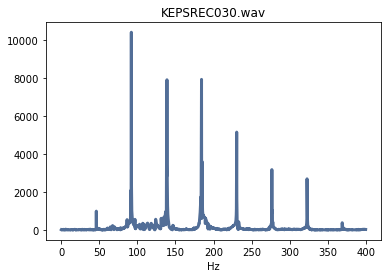

In [3]:
dirname = 'Samples'
fn = 'KEPSREC030.wav'

path = os.path.join(dirname, fn)
wave = thinkdsp.read_wave(path)
wave.normalize()
segment_5 = wave.segment(start=0, duration=5)
spectrum = segment_5.make_spectrum()
spectrum.plot(high=400)
thinkplot.config(title=fn, xlabel='Hz')
plt.show()
plt.close()

### Lessons learned
When I first iterated through all of the samples I had, I didn't know that each graph was going to show up on the same plot. That was a pretty amusing fail. I tried to get out of it using Allen's functions in his thinkplot module, particularly subplot(). However, I didn't understand his documentation for his wrapper functions, and he didn't illustrate the use of that one in his book.

I bypassed his thinkplot module and set up the data to use pyplot from the matplotlib module directly. Along the way, I learned that I can call the pyplot functions back to back with Allen's thinkplot functions.

But first, let's run my mistake, in which I omitted closing each plot and I superimposed all of them! This takes a while, but it's a pretty fail.

And while we're at it, let's do read into memory all of the audio files, all of the spectrums, and all of the plot data at once. Heck, memory is cheap, and I love to watch smoke come out of the bottom of my aging Macbook Pro.

In [4]:
dirname = 'Samples'
fils = os.listdir(dirname)
# print(fils)

# Yes, you know how to iterate. Let's prove it by using up all the memory on the planet.
# Read all of the audio files into a list and build all of the spectrums in another list.
wavs = []
spectrums = []
for i in fils:
    path = os.path.join(dirname, i)
    wav = thinkdsp.read_wave(path)
    seg = wav.segment(start=0, duration=5)
    spec = seg.make_spectrum()
    wavs.append(wav)         # add the sound to the list of clips.
    spectrums.append(spec)   # add the spectrum to the list of spectrums.

Go plot...

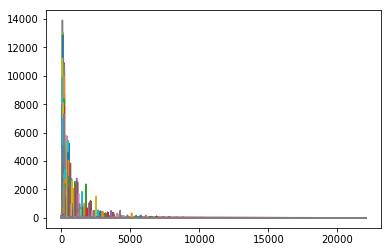

In [5]:
for f, s in zip(fils, spectrums):
    fs, amps = s.render_full()  # Use Allen's function to get the arrays of frequencies and amplitudes
                                # so you can plot these yourself.
    plt.plot(fs,amps)           # Oops, all I did was call plot(). I didn't close it with each iterations.

### Refrigerator painting
Those results weren't at all useful, but the teaching moment was. I learned some basics about pyplot. Like closing a plot!

I think it's kind of pretty that the shape of the plot resembles the shape of the overhead view of the piano. This graph correlates signal energy and frequency. Longer strings on the piano, with their lower frequencies, transmit more energy.

### One more time, with feeling
Let's fix the plotting and get some informative output. Now I'll reuse the variables in each iteration, reading the file, computing the spectrum, and plotting it. Then, in each pass close the plot before moving on to the next iteration.

* Put the note name and frequency in the title of each plot.
* Customize the scale of the horizontal axis. Allow for 4 overtones above the fundamental frequency. I put the standard frequencies for all piano notes in a file. A little data wrangling for starters.
* Later, I realized I wanted to play some of these back, so I added the index to each title so I could play the audio clip to any plot I wanted to hear.

In [6]:
dirname = 'Samples'                               # here's where I'm putting the piano samples
fils = os.listdir(dirname)                        # list all the file names

df = pd.read_csv('notes.csv', delimiter=',')      # i assembled a list of note names and frequencies in a csv.
                                                  # read those into a data frame
notes = [tuple(x) for x in df.values]             # export the data frame as a list of tuples

note_name, note_freq = notes[0]                   # here's how I'll access the tuples while looping through the files
print(note_name)
print(note_freq)

A1
55.0


### Study hall
Time to study the output. The title of each plot includes the standard frequency of the note. For reference, I also include half that value, which I suspect will be the multiple for the harmonics.
* What is the fundamental frequency?
* What is the dominant frequency?
* What is the spacing of the harmonics?

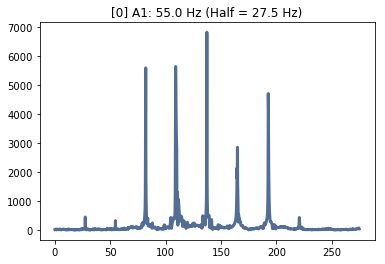

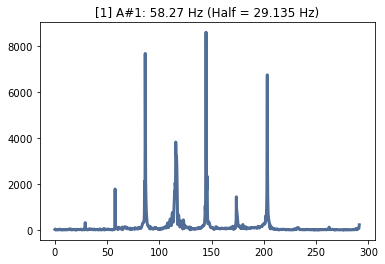

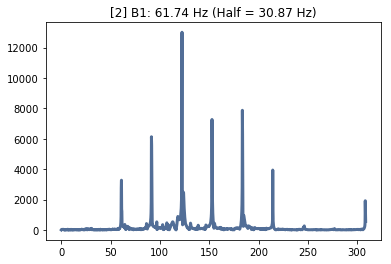

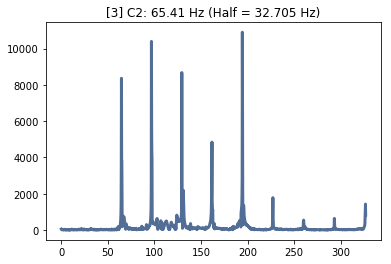

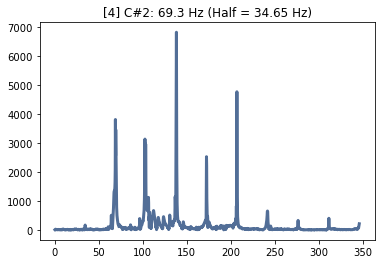

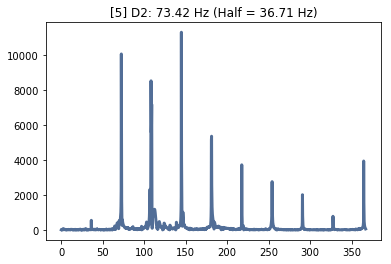

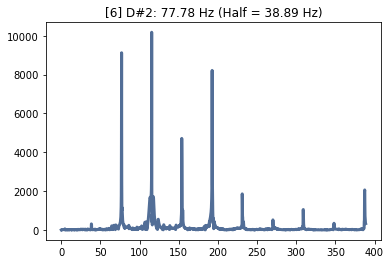

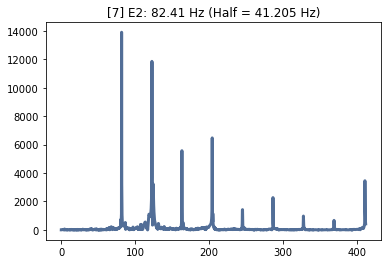

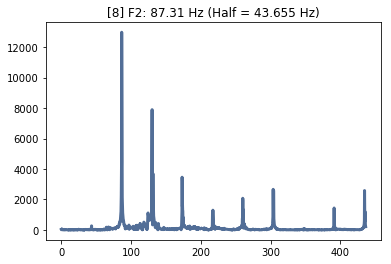

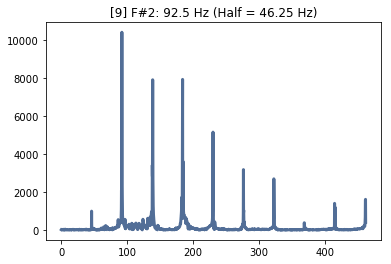

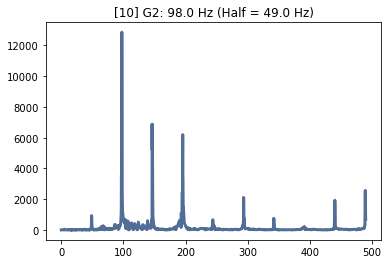

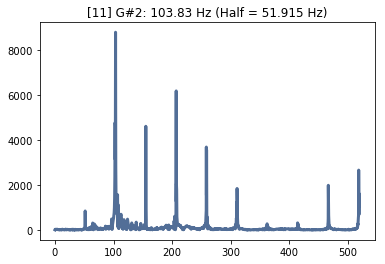

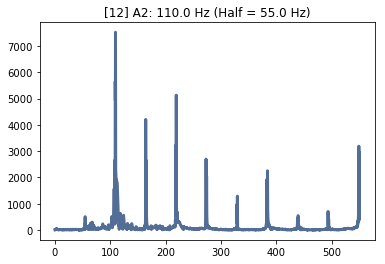

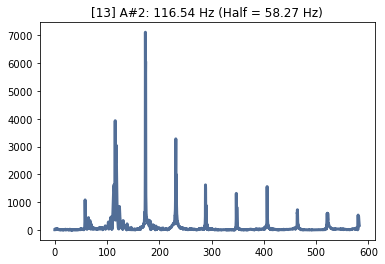

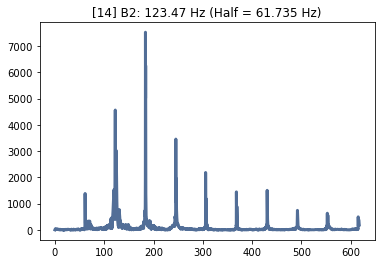

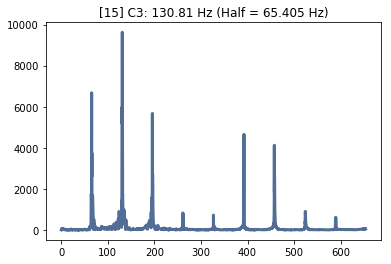

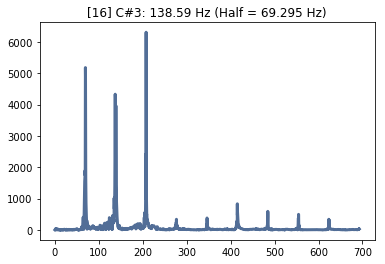

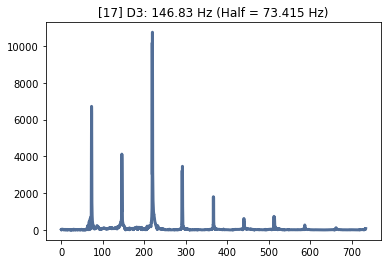

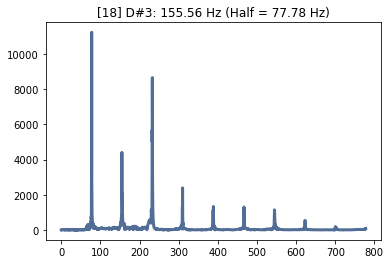

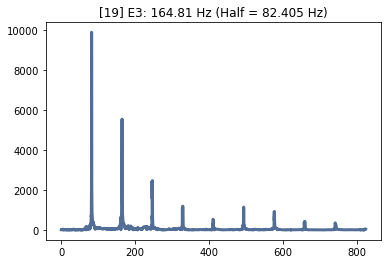

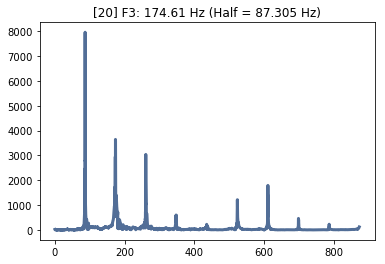

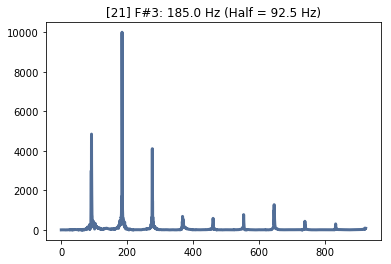

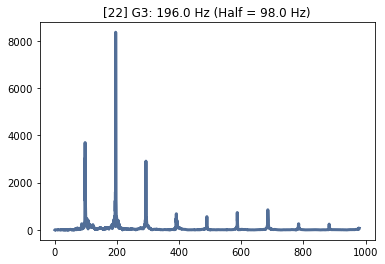

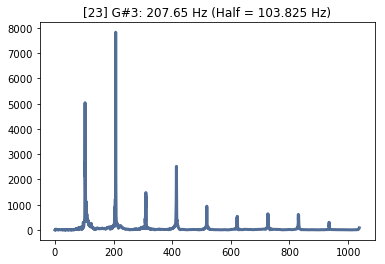

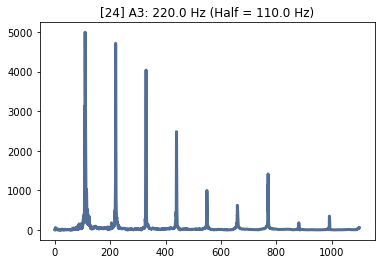

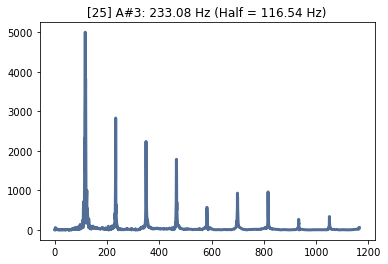

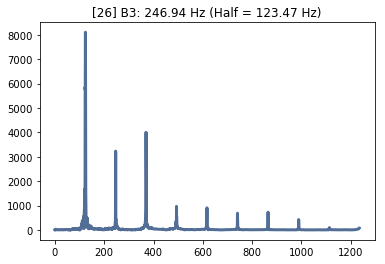

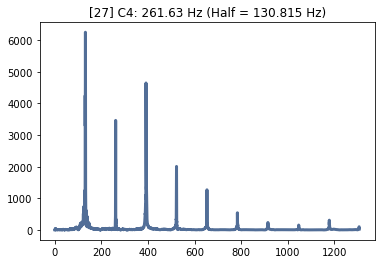

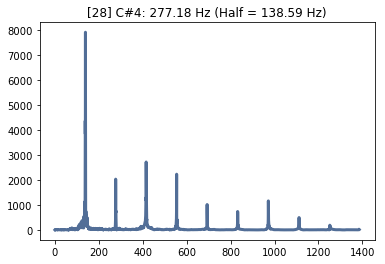

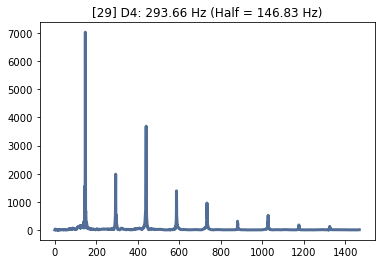

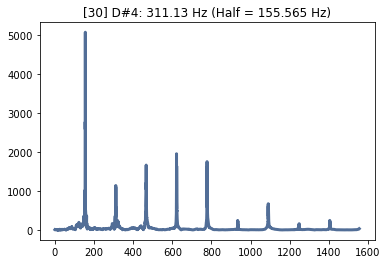

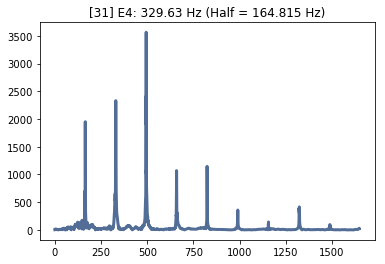

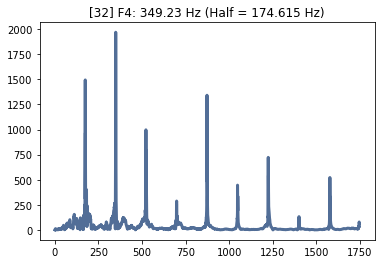

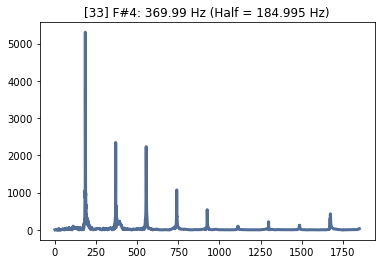

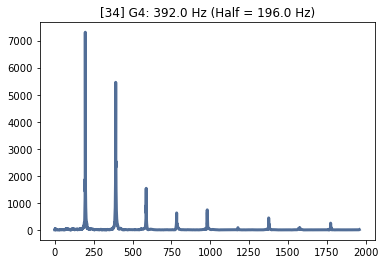

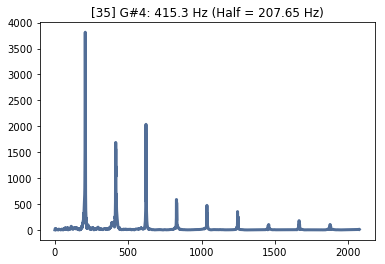

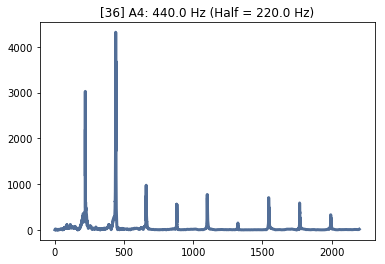

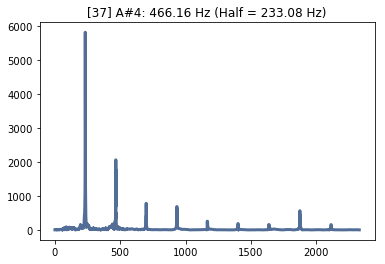

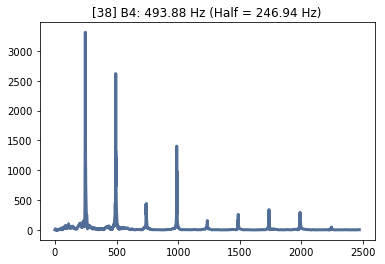

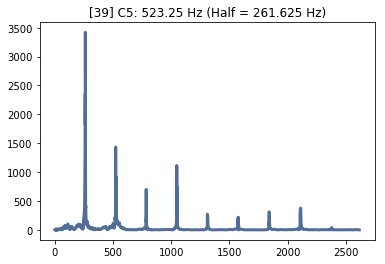

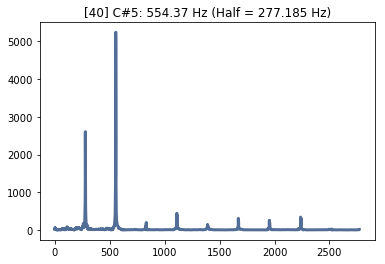

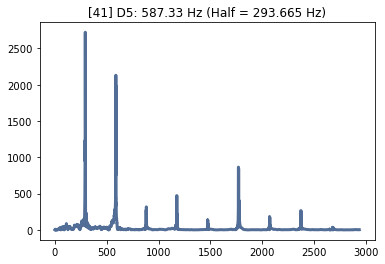

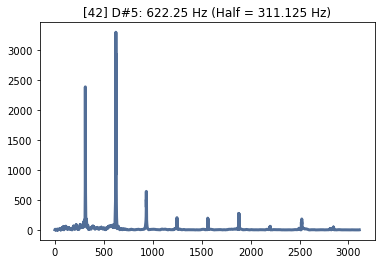

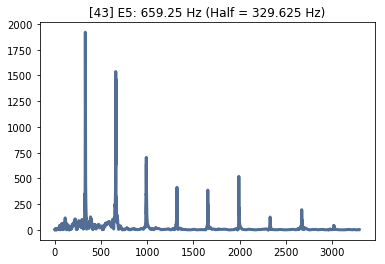

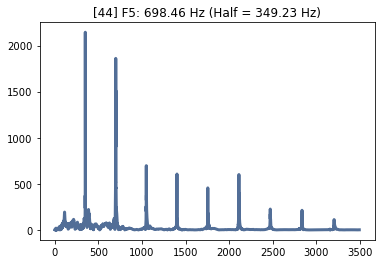

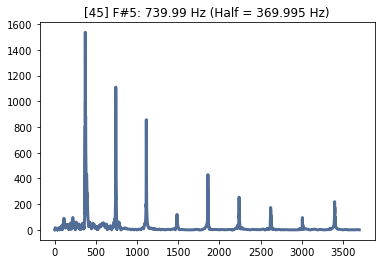

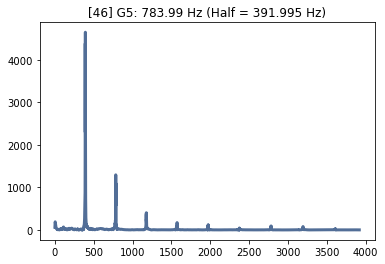

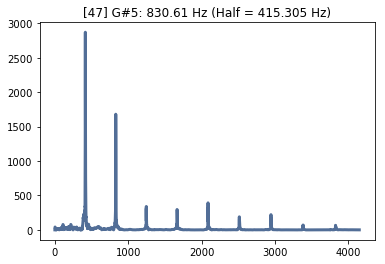

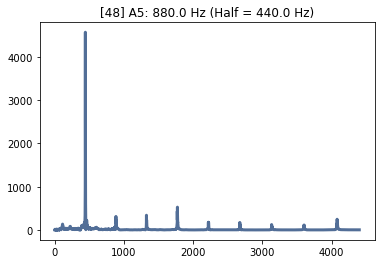

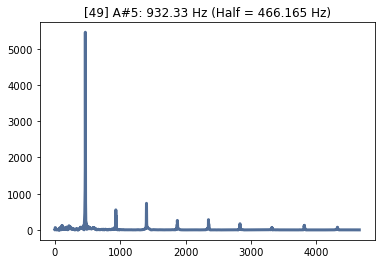

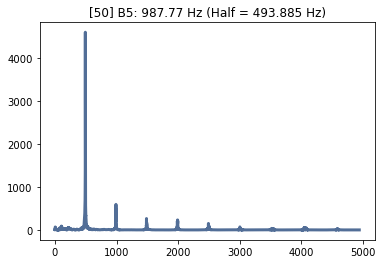

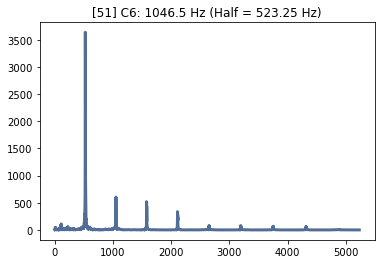

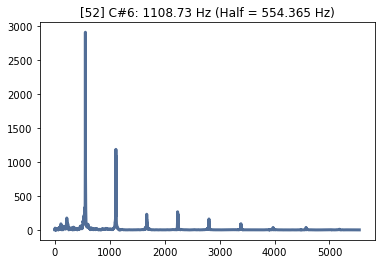

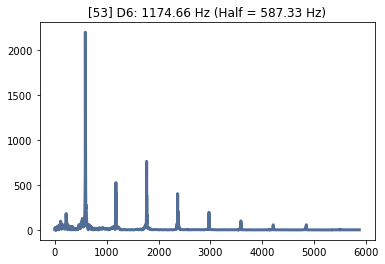

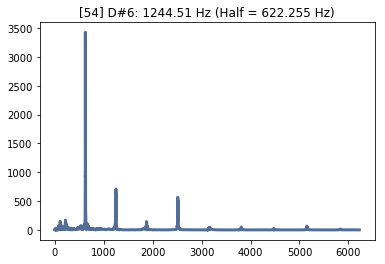

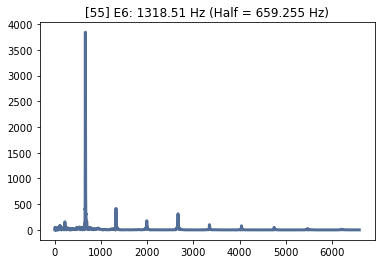

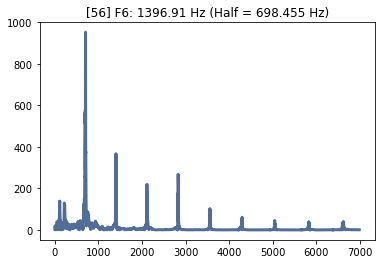

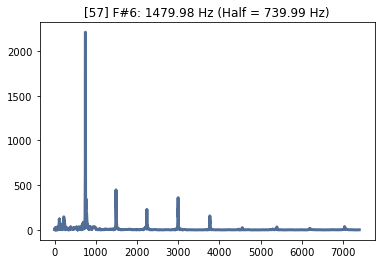

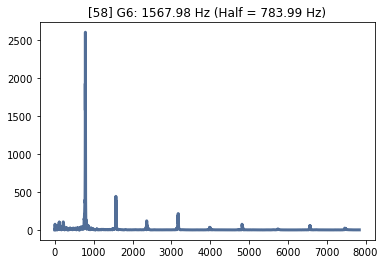

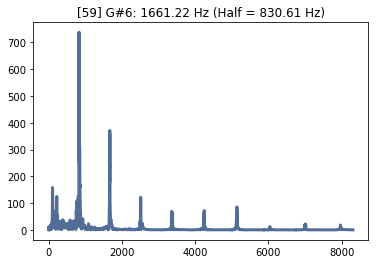

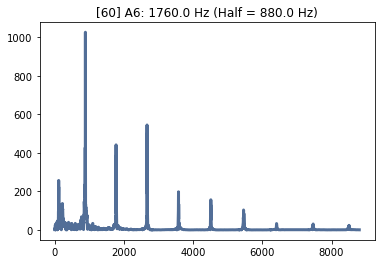

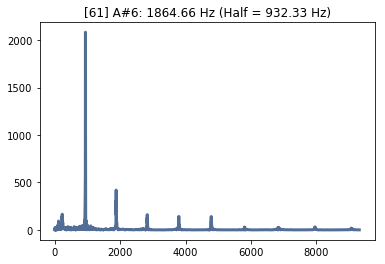

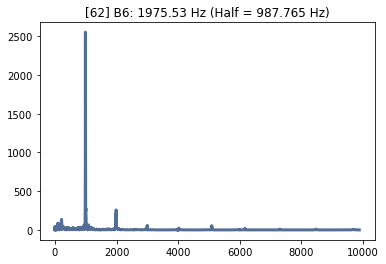

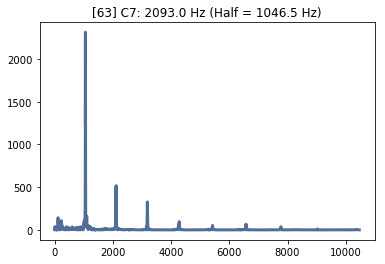

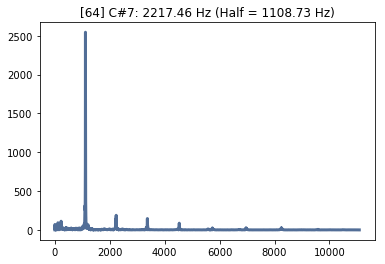

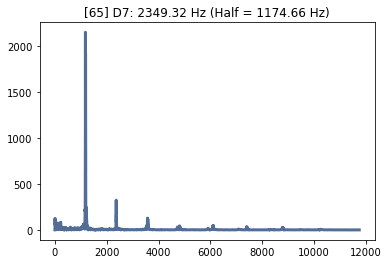

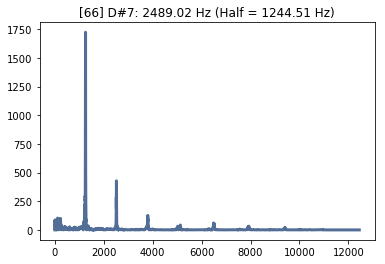

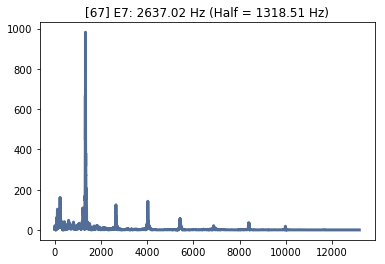

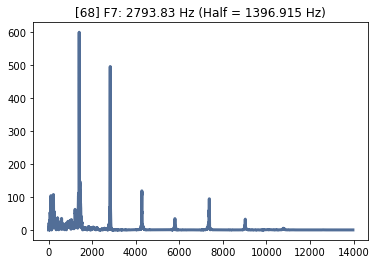

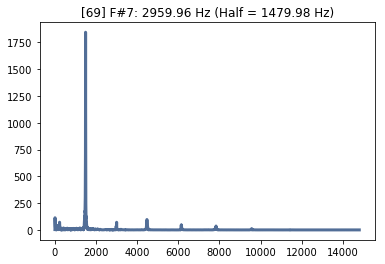

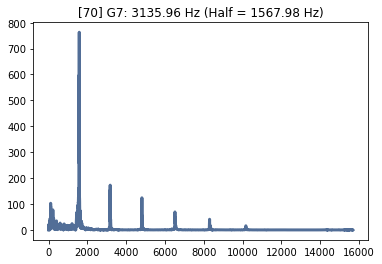

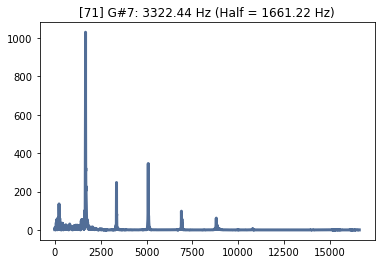

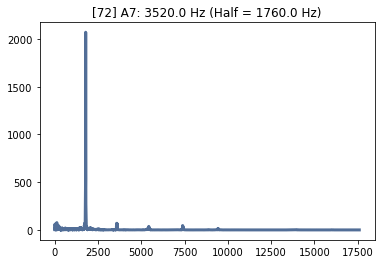

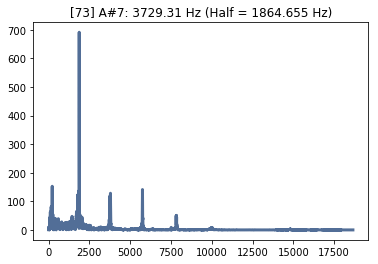

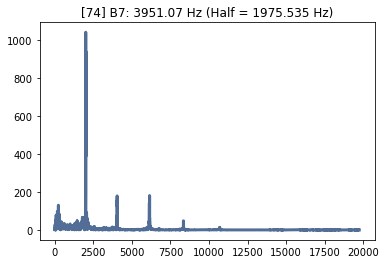

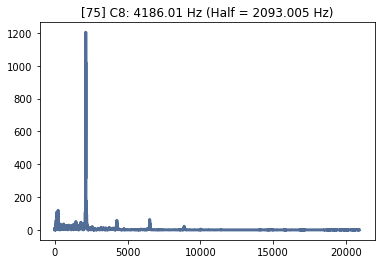

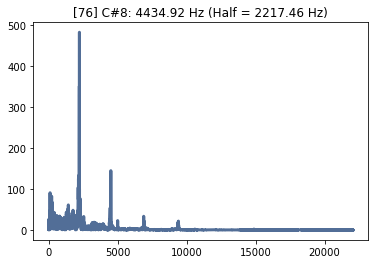

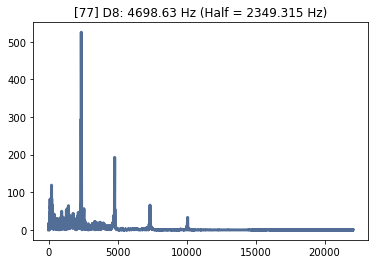

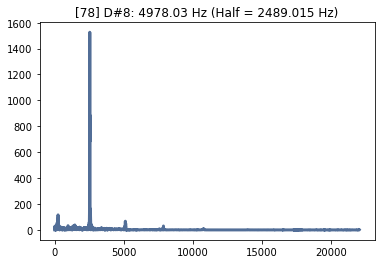

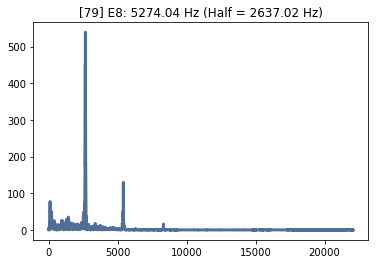

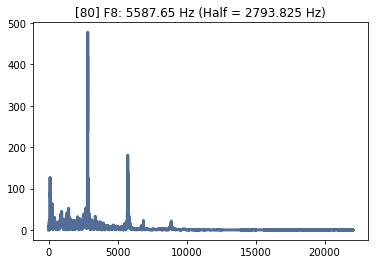

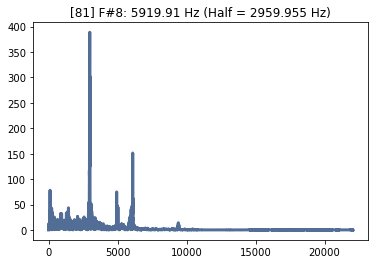

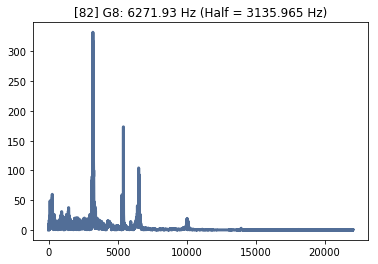

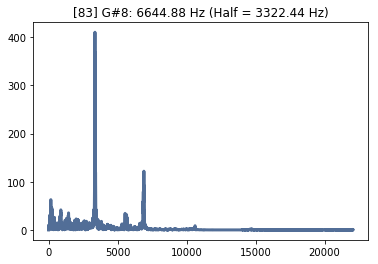

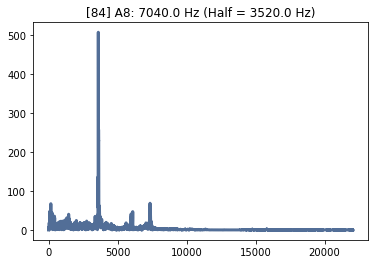

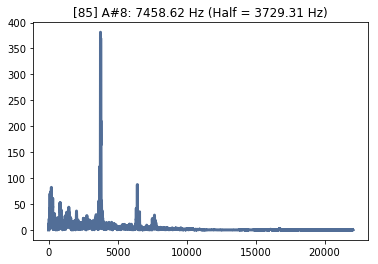

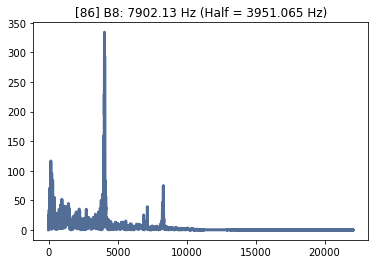

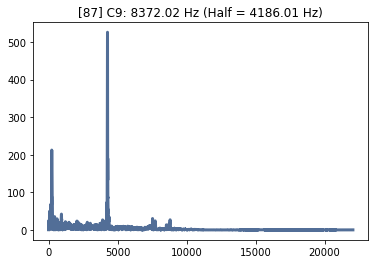

In [7]:
i = 0                                             # I'm using 2 iteration approaches at once, a counter for the
                                                  # notes & an iterator for the file list. Inelegant? Probably.
for fn in fils:
    path = os.path.join(dirname, fn)              # where's the audio file
    wave = thinkdsp.read_wave(path)               # read the audio file
    wave.normalize()                              # normalize it
    segment_5 = wave.segment(start=0, duration=5) # pick off the first 5 seconds
    spectrum = segment_5.make_spectrum()          # compute the spectrum; Fourier Transform
    
    note_name, note_freq = notes[i]               # get the note name and frequency from the note list
                                                  # make a nice title for the plot; what are you looking at?
    title = '[' + str(i) + '] ' + note_name + ': ' + str(note_freq) + ' Hz (Half = ' + str(note_freq/2) + ' Hz)'

    high = 5 * note_freq                          # customize the scale of the horizontal axis
    
    spectrum.plot(high=high)                      # plot
    thinkplot.config(title=title)
    plt.show()
    plt.close()                                   # put away your toys, boys
    
    i += 1                                        # next note


### Too clever by half
Every single note on this piano has a harmonic series that starts an octave **below** the perceived fundamental! The true fundamental is half the frequency of the perceived fundamental. For some of them that's even the dominant amplitude. (Don't those sound like they jump down an octave next to their neighbors?)

* It would be cool if I could put the playback widgets together with the plots. I don't see how to do that yet.
* For the ones that seem to have dominant frequencies in the wrong octave, I think I want to concatenate a series of adjacent samples so I can hear them in context.

Lets play back some of these bad boys. Wait, I thought I screwed up when I first read all that data into memory at once, but now that I need that data again after all...

<img src="img/not_sorry.jpg" style="height:250px">

In [9]:
i = 59 # set this to the index of the plot you want to hear and rerun the cell.

print(notes[i])
wavs[i].segment(start=0, duration=5).make_audio()

('G#6', 1661.22)


### Wrap up

#### First partial is the new fundamental
Piano strings have "undertones." The true fundamental is an octave below the perceived pitch of the note. The dominant frequency in the spectrum of a piano note is actually the first overtone in the harmonic series. Since harmonics are integer multiples of the fundamental frequency of a wave, the harmonics of a piano note are spaced at the interval of this so-called undertone.

#### Questions
1. Why is that?
1. Why did I never hear about this before?

#### Next steps
1. I think I have noticed before that a piano note had a prominent harmonic a mere fifth above the pitch of the note. I was curious about it, but dismissed it. Now go back and listen carefully for that fifth above the perceived fundamental on my own piano.
1. Find some experts in acoustics to pester with questions about it.